In [51]:
#loading all required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn import cluster, datasets, metrics
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [52]:
os.getcwd()

'/content'

In [53]:
# settings to display all rows
#pd.set_option("display.max_rows", None)
# settings to display all columns
#pd.set_option("display.max_columns", None)

In [54]:
#household = pd.read_csv('C:/Users/Priyanka Bhagwat/Desktop/WSP PROJECT/UKDA-8128-tab/tab/household.csv')
#wide = pd.read_csv('C:/Users/Priyanka Bhagwat/Desktop/WSP PROJECT/UKDA-8128-tab/tab/wide.csv',header= None)
#individual = pd.read_csv('C:/Users/Priyanka Bhagwat/Desktop/WSP PROJECT/UKDA-8128-tab/tab/individual.csv')
wksched = pd.read_csv('/content/wksched.csv',na_values=" ")
#episode = pd.read_csv('C:/Users/Priyanka Bhagwat/Desktop/WSP PROJECT/UKDA-8128-tab/tab/episode.csv')
#derivedtimevars = pd.read_csv('C:/Users/Priyanka Bhagwat/Desktop/WSP PROJECT/UKDA-8128-tab/tab/derivedtimevars.csv')

In [55]:
wksched.head()

,serial,strata,psu,pnum,wks_wt,dvage,flag_impute_date,imonth,iyear,flag_impute_dow,dow1_sched,date1_sched,sched_diaryday1,t0400_0415_d1,t0415_0430_d1,t0430_0445_d1,t0445_0500_d1,t0500_0515_d1,t0515_0530_d1,t0530_0545_d1,t0545_0600_d1,t0600_0615_d1,t0615_0630_d1,t0630_0645_d1,t0645_0700_d1,t0700_0715_d1,t0715_0730_d1,t0730_0745_d1,t0745_0800_d1,t0800_0815_d1,t0815_0830_d1,t0830_0845_d1,t0845_0900_d1,t0900_0915_d1,t0915_0930_d1,t0930_0945_d1,t0945_1000_d1,t1000_1015_d1,t1015_1030_d1,t1030_1045_d1,...,t1815_1830_d7,t1830_1845_d7,t1845_1900_d7,t1900_1915_d7,t1915_1930_d7,t1930_1945_d7,t1945_2000_d7,t2000_2015_d7,t2015_2030_d7,t2030_2045_d7,t2045_2100_d7,t2100_2115_d7,t2115_2130_d7,t2130_2145_d7,t2145_2200_d7,t2200_2215_d7,t2215_2230_d7,t2230_2245_d7,t2245_2300_d7,t2300_2315_d7,t2315_2330_d7,t2330_2345_d7,t2345_2400_d7,t0000_0015_d7,t0015_0030_d7,t0030_0045_d7,t0045_0100_d7,t0100_0115_d7,t0115_0130_d7,t0130_0145_d7,t0145_0200_d7,t0200_0215_d7,t0215_0230_d7,t0230_0245_d7,t0245_0300_d7,t0300_0315_d7,t0315_0330_d7,t0330_0345_d7,t0345_0400_d7,compl_wk
0,11011202,110,117,1,NaN,48,-2,17,2014,Not imputed,4.0,12-11-2014,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Day(s) missing
1,11011209,110,117,1,1.778489,69,0,17,2014,Not imputed,3.0,12-03-2014,2.0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Complete record
2,11011209,110,117,2,NaN,60,-2,17,2014,Not imputed,3.0,12-03-2014,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Complete record
3,11011210,110,117,2,1.997310,36,0,17,2014,Not imputed,4.0,12-11-2014,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Complete record
4,11011212,110,117,1,NaN,41,-2,6,2015,Not imputed,6.0,01-10-2015,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Complete record


In [56]:
wksched.shape

(3523, 686)

In [57]:
type(wksched)

pandas.core.frame.DataFrame

In [58]:
type(wksched.date1_sched)

pandas.core.series.Series

In [59]:
del wksched['flag_impute_dow']

In [60]:
del wksched['compl_wk']

In [61]:
wksched.dtypes

serial             int64
strata             int64
psu                int64
pnum               int64
wks_wt           float64
                  ...   
t0245_0300_d7      int64
t0300_0315_d7      int64
t0315_0330_d7      int64
t0330_0345_d7      int64
t0345_0400_d7      int64
Length: 684, dtype: object

In [62]:
wksched.serial = wksched.serial.astype(int)

In [63]:
wksched.date1_sched = pd.to_datetime(wksched.date1_sched)
wksched.head(15)

,serial,strata,psu,pnum,wks_wt,dvage,flag_impute_date,imonth,iyear,dow1_sched,date1_sched,sched_diaryday1,t0400_0415_d1,t0415_0430_d1,t0430_0445_d1,t0445_0500_d1,t0500_0515_d1,t0515_0530_d1,t0530_0545_d1,t0545_0600_d1,t0600_0615_d1,t0615_0630_d1,t0630_0645_d1,t0645_0700_d1,t0700_0715_d1,t0715_0730_d1,t0730_0745_d1,t0745_0800_d1,t0800_0815_d1,t0815_0830_d1,t0830_0845_d1,t0845_0900_d1,t0900_0915_d1,t0915_0930_d1,t0930_0945_d1,t0945_1000_d1,t1000_1015_d1,t1015_1030_d1,t1030_1045_d1,t1045_1100_d1,...,t1800_1815_d7,t1815_1830_d7,t1830_1845_d7,t1845_1900_d7,t1900_1915_d7,t1915_1930_d7,t1930_1945_d7,t1945_2000_d7,t2000_2015_d7,t2015_2030_d7,t2030_2045_d7,t2045_2100_d7,t2100_2115_d7,t2115_2130_d7,t2130_2145_d7,t2145_2200_d7,t2200_2215_d7,t2215_2230_d7,t2230_2245_d7,t2245_2300_d7,t2300_2315_d7,t2315_2330_d7,t2330_2345_d7,t2345_2400_d7,t0000_0015_d7,t0015_0030_d7,t0030_0045_d7,t0045_0100_d7,t0100_0115_d7,t0115_0130_d7,t0130_0145_d7,t0145_0200_d7,t0200_0215_d7,t0215_0230_d7,t0230_0245_d7,t0245_0300_d7,t0300_0315_d7,t0315_0330_d7,t0330_0345_d7,t0345_0400_d7
0,11011202,110,117,1,NaN,48,-2,17,2014,4.0,2014-12-11,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,11011209,110,117,1,1.778489,69,0,17,2014,3.0,2014-12-03,2.0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,11011209,110,117,2,NaN,60,-2,17,2014,3.0,2014-12-03,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,11011210,110,117,2,1.997310,36,0,17,2014,4.0,2014-12-11,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,11011212,110,117,1,NaN,41,-2,6,2015,6.0,2015-01-10,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,11011212,110,117,2,1.229678,44,0,6,2015,6.0,2015-01-10,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,11011213,110,117,1,0.771474,42,0,6,2015,6.0,2015-01-10,2.0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,11011213,110,117,4,NaN,40,-2,6,2015,7.0,2015-01-10,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,11011220,110,117,1,0.955513,52,0,6,2015,7.0,2015-01-18,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,11011220,110,117,2,0.872446,54,0,6,2015,7.0,2015-01-18,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [64]:
wksched.dtypes

serial             int64
strata             int64
psu                int64
pnum               int64
wks_wt           float64
                  ...   
t0245_0300_d7      int64
t0300_0315_d7      int64
t0315_0330_d7      int64
t0330_0345_d7      int64
t0345_0400_d7      int64
Length: 684, dtype: object

In [65]:
wksched.isna().sum()

serial              0
strata              0
psu                 0
pnum                0
wks_wt           1434
                 ... 
t0245_0300_d7       0
t0300_0315_d7       0
t0315_0330_d7       0
t0330_0345_d7       0
t0345_0400_d7       0
Length: 684, dtype: int64

In [66]:
wksched.dropna(subset=['wks_wt','date1_sched','sched_diaryday1'],inplace=True)

In [67]:
wksched.head(15)

,serial,strata,psu,pnum,wks_wt,dvage,flag_impute_date,imonth,iyear,dow1_sched,date1_sched,sched_diaryday1,t0400_0415_d1,t0415_0430_d1,t0430_0445_d1,t0445_0500_d1,t0500_0515_d1,t0515_0530_d1,t0530_0545_d1,t0545_0600_d1,t0600_0615_d1,t0615_0630_d1,t0630_0645_d1,t0645_0700_d1,t0700_0715_d1,t0715_0730_d1,t0730_0745_d1,t0745_0800_d1,t0800_0815_d1,t0815_0830_d1,t0830_0845_d1,t0845_0900_d1,t0900_0915_d1,t0915_0930_d1,t0930_0945_d1,t0945_1000_d1,t1000_1015_d1,t1015_1030_d1,t1030_1045_d1,t1045_1100_d1,...,t1800_1815_d7,t1815_1830_d7,t1830_1845_d7,t1845_1900_d7,t1900_1915_d7,t1915_1930_d7,t1930_1945_d7,t1945_2000_d7,t2000_2015_d7,t2015_2030_d7,t2030_2045_d7,t2045_2100_d7,t2100_2115_d7,t2115_2130_d7,t2130_2145_d7,t2145_2200_d7,t2200_2215_d7,t2215_2230_d7,t2230_2245_d7,t2245_2300_d7,t2300_2315_d7,t2315_2330_d7,t2330_2345_d7,t2345_2400_d7,t0000_0015_d7,t0015_0030_d7,t0030_0045_d7,t0045_0100_d7,t0100_0115_d7,t0115_0130_d7,t0130_0145_d7,t0145_0200_d7,t0200_0215_d7,t0215_0230_d7,t0230_0245_d7,t0245_0300_d7,t0300_0315_d7,t0315_0330_d7,t0330_0345_d7,t0345_0400_d7
1,11011209,110,117,1,1.778489,69,0,17,2014,3.0,2014-12-03,2.0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,11011210,110,117,2,1.997310,36,0,17,2014,4.0,2014-12-11,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,11011212,110,117,2,1.229678,44,0,6,2015,6.0,2015-01-10,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,11011213,110,117,1,0.771474,42,0,6,2015,6.0,2015-01-10,2.0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,11011220,110,117,1,0.955513,52,0,6,2015,7.0,2015-01-18,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,11011220,110,117,2,0.872446,54,0,6,2015,7.0,2015-01-18,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
10,11011220,110,117,3,1.564550,23,0,6,2015,1.0,2015-01-19,1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
14,11020212,117,131,1,0.448650,49,0,7,2015,4.0,2015-02-26,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
15,11020212,117,131,2,0.430754,50,0,7,2015,4.0,2015-02-26,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
16,11020301,104,106,1,0.906016,53,0,9,2015,6.0,2015-04-18,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [68]:
wksched.drop_duplicates(subset="serial", keep="first", inplace=True)

In [69]:
wksched.head(20)

,serial,strata,psu,pnum,wks_wt,dvage,flag_impute_date,imonth,iyear,dow1_sched,date1_sched,sched_diaryday1,t0400_0415_d1,t0415_0430_d1,t0430_0445_d1,t0445_0500_d1,t0500_0515_d1,t0515_0530_d1,t0530_0545_d1,t0545_0600_d1,t0600_0615_d1,t0615_0630_d1,t0630_0645_d1,t0645_0700_d1,t0700_0715_d1,t0715_0730_d1,t0730_0745_d1,t0745_0800_d1,t0800_0815_d1,t0815_0830_d1,t0830_0845_d1,t0845_0900_d1,t0900_0915_d1,t0915_0930_d1,t0930_0945_d1,t0945_1000_d1,t1000_1015_d1,t1015_1030_d1,t1030_1045_d1,t1045_1100_d1,...,t1800_1815_d7,t1815_1830_d7,t1830_1845_d7,t1845_1900_d7,t1900_1915_d7,t1915_1930_d7,t1930_1945_d7,t1945_2000_d7,t2000_2015_d7,t2015_2030_d7,t2030_2045_d7,t2045_2100_d7,t2100_2115_d7,t2115_2130_d7,t2130_2145_d7,t2145_2200_d7,t2200_2215_d7,t2215_2230_d7,t2230_2245_d7,t2245_2300_d7,t2300_2315_d7,t2315_2330_d7,t2330_2345_d7,t2345_2400_d7,t0000_0015_d7,t0015_0030_d7,t0030_0045_d7,t0045_0100_d7,t0100_0115_d7,t0115_0130_d7,t0130_0145_d7,t0145_0200_d7,t0200_0215_d7,t0215_0230_d7,t0230_0245_d7,t0245_0300_d7,t0300_0315_d7,t0315_0330_d7,t0330_0345_d7,t0345_0400_d7
1,11011209,110,117,1,1.778489,69,0,17,2014,3.0,2014-12-03,2.0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,11011210,110,117,2,1.997310,36,0,17,2014,4.0,2014-12-11,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,11011212,110,117,2,1.229678,44,0,6,2015,6.0,2015-01-10,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,11011213,110,117,1,0.771474,42,0,6,2015,6.0,2015-01-10,2.0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,11011220,110,117,1,0.955513,52,0,6,2015,7.0,2015-01-18,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
14,11020212,117,131,1,0.448650,49,0,7,2015,4.0,2015-02-26,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
16,11020301,104,106,1,0.906016,53,0,9,2015,6.0,2015-04-18,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19,11020305,104,106,1,0.717545,27,0,8,2015,4.0,2015-03-12,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
20,11020310,104,106,1,0.469423,65,0,8,2015,3.0,2015-03-18,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
21,11020315,104,106,1,0.731855,43,0,9,2015,7.0,2015-04-05,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [70]:
#list(wksched.columns)

In [71]:
day1_timeslot = wksched.loc[:,'t0400_0415_d1':'t0345_0400_d1']
day1_timeslot.head()

,t0400_0415_d1,t0415_0430_d1,t0430_0445_d1,t0445_0500_d1,t0500_0515_d1,t0515_0530_d1,t0530_0545_d1,t0545_0600_d1,t0600_0615_d1,t0615_0630_d1,t0630_0645_d1,t0645_0700_d1,t0700_0715_d1,t0715_0730_d1,t0730_0745_d1,t0745_0800_d1,t0800_0815_d1,t0815_0830_d1,t0830_0845_d1,t0845_0900_d1,t0900_0915_d1,t0915_0930_d1,t0930_0945_d1,t0945_1000_d1,t1000_1015_d1,t1015_1030_d1,t1030_1045_d1,t1045_1100_d1,t1100_1115_d1,t1115_1130_d1,t1130_1145_d1,t1145_1200_d1,t1200_1215_d1,t1215_1230_d1,t1230_1245_d1,t1245_1300_d1,t1300_1315_d1,t1315_1330_d1,t1330_1345_d1,t1345_1400_d1,...,t1800_1815_d1,t1815_1830_d1,t1830_1845_d1,t1845_1900_d1,t1900_1915_d1,t1915_1930_d1,t1930_1945_d1,t1945_2000_d1,t2000_2015_d1,t2015_2030_d1,t2030_2045_d1,t2045_2100_d1,t2100_2115_d1,t2115_2130_d1,t2130_2145_d1,t2145_2200_d1,t2200_2215_d1,t2215_2230_d1,t2230_2245_d1,t2245_2300_d1,t2300_2315_d1,t2315_2330_d1,t2330_2345_d1,t2345_2400_d1,t0000_0015_d1,t0015_0030_d1,t0030_0045_d1,t0045_0100_d1,t0100_0115_d1,t0115_0130_d1,t0130_0145_d1,t0145_0200_d1,t0200_0215_d1,t0215_0230_d1,t0230_0245_d1,t0245_0300_d1,t0300_0315_d1,t0315_0330_d1,t0330_0345_d1,t0345_0400_d1
1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [72]:
day2_timeslot = wksched.loc[:,'t0400_0415_d2':'t0345_0400_d2']
day2_timeslot.head()

,t0400_0415_d2,t0415_0430_d2,t0430_0445_d2,t0445_0500_d2,t0500_0515_d2,t0515_0530_d2,t0530_0545_d2,t0545_0600_d2,t0600_0615_d2,t0615_0630_d2,t0630_0645_d2,t0645_0700_d2,t0700_0715_d2,t0715_0730_d2,t0730_0745_d2,t0745_0800_d2,t0800_0815_d2,t0815_0830_d2,t0830_0845_d2,t0845_0900_d2,t0900_0915_d2,t0915_0930_d2,t0930_0945_d2,t0945_1000_d2,t1000_1015_d2,t1015_1030_d2,t1030_1045_d2,t1045_1100_d2,t1100_1115_d2,t1115_1130_d2,t1130_1145_d2,t1145_1200_d2,t1200_1215_d2,t1215_1230_d2,t1230_1245_d2,t1245_1300_d2,t1300_1315_d2,t1315_1330_d2,t1330_1345_d2,t1345_1400_d2,...,t1800_1815_d2,t1815_1830_d2,t1830_1845_d2,t1845_1900_d2,t1900_1915_d2,t1915_1930_d2,t1930_1945_d2,t1945_2000_d2,t2000_2015_d2,t2015_2030_d2,t2030_2045_d2,t2045_2100_d2,t2100_2115_d2,t2115_2130_d2,t2130_2145_d2,t2145_2200_d2,t2200_2215_d2,t2215_2230_d2,t2230_2245_d2,t2245_2300_d2,t2300_2315_d2,t2315_2330_d2,t2330_2345_d2,t2345_2400_d2,t0000_0015_d2,t0015_0030_d2,t0030_0045_d2,t0045_0100_d2,t0100_0115_d2,t0115_0130_d2,t0130_0145_d2,t0145_0200_d2,t0200_0215_d2,t0215_0230_d2,t0230_0245_d2,t0245_0300_d2,t0300_0315_d2,t0315_0330_d2,t0330_0345_d2,t0345_0400_d2
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,...,1,2,2,1,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [73]:
day3_timeslot = wksched.loc[:,'t0400_0415_d3':'t0345_0400_d3']
day3_timeslot.head()

,t0400_0415_d3,t0415_0430_d3,t0430_0445_d3,t0445_0500_d3,t0500_0515_d3,t0515_0530_d3,t0530_0545_d3,t0545_0600_d3,t0600_0615_d3,t0615_0630_d3,t0630_0645_d3,t0645_0700_d3,t0700_0715_d3,t0715_0730_d3,t0730_0745_d3,t0745_0800_d3,t0800_0815_d3,t0815_0830_d3,t0830_0845_d3,t0845_0900_d3,t0900_0915_d3,t0915_0930_d3,t0930_0945_d3,t0945_1000_d3,t1000_1015_d3,t1015_1030_d3,t1030_1045_d3,t1045_1100_d3,t1100_1115_d3,t1115_1130_d3,t1130_1145_d3,t1145_1200_d3,t1200_1215_d3,t1215_1230_d3,t1230_1245_d3,t1245_1300_d3,t1300_1315_d3,t1315_1330_d3,t1330_1345_d3,t1345_1400_d3,...,t1800_1815_d3,t1815_1830_d3,t1830_1845_d3,t1845_1900_d3,t1900_1915_d3,t1915_1930_d3,t1930_1945_d3,t1945_2000_d3,t2000_2015_d3,t2015_2030_d3,t2030_2045_d3,t2045_2100_d3,t2100_2115_d3,t2115_2130_d3,t2130_2145_d3,t2145_2200_d3,t2200_2215_d3,t2215_2230_d3,t2230_2245_d3,t2245_2300_d3,t2300_2315_d3,t2315_2330_d3,t2330_2345_d3,t2345_2400_d3,t0000_0015_d3,t0015_0030_d3,t0030_0045_d3,t0045_0100_d3,t0100_0115_d3,t0115_0130_d3,t0130_0145_d3,t0145_0200_d3,t0200_0215_d3,t0215_0230_d3,t0230_0245_d3,t0245_0300_d3,t0300_0315_d3,t0315_0330_d3,t0330_0345_d3,t0345_0400_d3
1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,1,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [74]:
day4_timeslot = wksched.loc[:,'t0400_0415_d4':'t0345_0400_d4']
day4_timeslot.head()

,t0400_0415_d4,t0415_0430_d4,t0430_0445_d4,t0445_0500_d4,t0500_0515_d4,t0515_0530_d4,t0530_0545_d4,t0545_0600_d4,t0600_0615_d4,t0615_0630_d4,t0630_0645_d4,t0645_0700_d4,t0700_0715_d4,t0715_0730_d4,t0730_0745_d4,t0745_0800_d4,t0800_0815_d4,t0815_0830_d4,t0830_0845_d4,t0845_0900_d4,t0900_0915_d4,t0915_0930_d4,t0930_0945_d4,t0945_1000_d4,t1000_1015_d4,t1015_1030_d4,t1030_1045_d4,t1045_1100_d4,t1100_1115_d4,t1115_1130_d4,t1130_1145_d4,t1145_1200_d4,t1200_1215_d4,t1215_1230_d4,t1230_1245_d4,t1245_1300_d4,t1300_1315_d4,t1315_1330_d4,t1330_1345_d4,t1345_1400_d4,...,t1800_1815_d4,t1815_1830_d4,t1830_1845_d4,t1845_1900_d4,t1900_1915_d4,t1915_1930_d4,t1930_1945_d4,t1945_2000_d4,t2000_2015_d4,t2015_2030_d4,t2030_2045_d4,t2045_2100_d4,t2100_2115_d4,t2115_2130_d4,t2130_2145_d4,t2145_2200_d4,t2200_2215_d4,t2215_2230_d4,t2230_2245_d4,t2245_2300_d4,t2300_2315_d4,t2315_2330_d4,t2330_2345_d4,t2345_2400_d4,t0000_0015_d4,t0015_0030_d4,t0030_0045_d4,t0045_0100_d4,t0100_0115_d4,t0115_0130_d4,t0130_0145_d4,t0145_0200_d4,t0200_0215_d4,t0215_0230_d4,t0230_0245_d4,t0245_0300_d4,t0300_0315_d4,t0315_0330_d4,t0330_0345_d4,t0345_0400_d4
1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [75]:
day5_timeslot = wksched.loc[:,'t0400_0415_d5':'t0345_0400_d5']
day5_timeslot.head()

,t0400_0415_d5,t0415_0430_d5,t0430_0445_d5,t0445_0500_d5,t0500_0515_d5,t0515_0530_d5,t0530_0545_d5,t0545_0600_d5,t0600_0615_d5,t0615_0630_d5,t0630_0645_d5,t0645_0700_d5,t0700_0715_d5,t0715_0730_d5,t0730_0745_d5,t0745_0800_d5,t0800_0815_d5,t0815_0830_d5,t0830_0845_d5,t0845_0900_d5,t0900_0915_d5,t0915_0930_d5,t0930_0945_d5,t0945_1000_d5,t1000_1015_d5,t1015_1030_d5,t1030_1045_d5,t1045_1100_d5,t1100_1115_d5,t1115_1130_d5,t1130_1145_d5,t1145_1200_d5,t1200_1215_d5,t1215_1230_d5,t1230_1245_d5,t1245_1300_d5,t1300_1315_d5,t1315_1330_d5,t1330_1345_d5,t1345_1400_d5,...,t1800_1815_d5,t1815_1830_d5,t1830_1845_d5,t1845_1900_d5,t1900_1915_d5,t1915_1930_d5,t1930_1945_d5,t1945_2000_d5,t2000_2015_d5,t2015_2030_d5,t2030_2045_d5,t2045_2100_d5,t2100_2115_d5,t2115_2130_d5,t2130_2145_d5,t2145_2200_d5,t2200_2215_d5,t2215_2230_d5,t2230_2245_d5,t2245_2300_d5,t2300_2315_d5,t2315_2330_d5,t2330_2345_d5,t2345_2400_d5,t0000_0015_d5,t0015_0030_d5,t0030_0045_d5,t0045_0100_d5,t0100_0115_d5,t0115_0130_d5,t0130_0145_d5,t0145_0200_d5,t0200_0215_d5,t0215_0230_d5,t0230_0245_d5,t0245_0300_d5,t0300_0315_d5,t0315_0330_d5,t0330_0345_d5,t0345_0400_d5
1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [76]:
day6_timeslot = wksched.loc[:,'t0400_0415_d6':'t0345_0400_d6']
day6_timeslot.head()

,t0400_0415_d6,t0415_0430_d6,t0430_0445_d6,t0445_0500_d6,t0500_0515_d6,t0515_0530_d6,t0530_0545_d6,t0545_0600_d6,t0600_0615_d6,t0615_0630_d6,t0630_0645_d6,t0645_0700_d6,t0700_0715_d6,t0715_0730_d6,t0730_0745_d6,t0745_0800_d6,t0800_0815_d6,t0815_0830_d6,t0830_0845_d6,t0845_0900_d6,t0900_0915_d6,t0915_0930_d6,t0930_0945_d6,t0945_1000_d6,t1000_1015_d6,t1015_1030_d6,t1030_1045_d6,t1045_1100_d6,t1100_1115_d6,t1115_1130_d6,t1130_1145_d6,t1145_1200_d6,t1200_1215_d6,t1215_1230_d6,t1230_1245_d6,t1245_1300_d6,t1300_1315_d6,t1315_1330_d6,t1330_1345_d6,t1345_1400_d6,...,t1800_1815_d6,t1815_1830_d6,t1830_1845_d6,t1845_1900_d6,t1900_1915_d6,t1915_1930_d6,t1930_1945_d6,t1945_2000_d6,t2000_2015_d6,t2015_2030_d6,t2030_2045_d6,t2045_2100_d6,t2100_2115_d6,t2115_2130_d6,t2130_2145_d6,t2145_2200_d6,t2200_2215_d6,t2215_2230_d6,t2230_2245_d6,t2245_2300_d6,t2300_2315_d6,t2315_2330_d6,t2330_2345_d6,t2345_2400_d6,t0000_0015_d6,t0015_0030_d6,t0030_0045_d6,t0045_0100_d6,t0100_0115_d6,t0115_0130_d6,t0130_0145_d6,t0145_0200_d6,t0200_0215_d6,t0215_0230_d6,t0230_0245_d6,t0245_0300_d6,t0300_0315_d6,t0315_0330_d6,t0330_0345_d6,t0345_0400_d6
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [77]:
day7_timeslot = wksched.loc[:,'t0400_0415_d7':'t0345_0400_d7']
day7_timeslot.head()

,t0400_0415_d7,t0415_0430_d7,t0430_0445_d7,t0445_0500_d7,t0500_0515_d7,t0515_0530_d7,t0530_0545_d7,t0545_0600_d7,t0600_0615_d7,t0615_0630_d7,t0630_0645_d7,t0645_0700_d7,t0700_0715_d7,t0715_0730_d7,t0730_0745_d7,t0745_0800_d7,t0800_0815_d7,t0815_0830_d7,t0830_0845_d7,t0845_0900_d7,t0900_0915_d7,t0915_0930_d7,t0930_0945_d7,t0945_1000_d7,t1000_1015_d7,t1015_1030_d7,t1030_1045_d7,t1045_1100_d7,t1100_1115_d7,t1115_1130_d7,t1130_1145_d7,t1145_1200_d7,t1200_1215_d7,t1215_1230_d7,t1230_1245_d7,t1245_1300_d7,t1300_1315_d7,t1315_1330_d7,t1330_1345_d7,t1345_1400_d7,...,t1800_1815_d7,t1815_1830_d7,t1830_1845_d7,t1845_1900_d7,t1900_1915_d7,t1915_1930_d7,t1930_1945_d7,t1945_2000_d7,t2000_2015_d7,t2015_2030_d7,t2030_2045_d7,t2045_2100_d7,t2100_2115_d7,t2115_2130_d7,t2130_2145_d7,t2145_2200_d7,t2200_2215_d7,t2215_2230_d7,t2230_2245_d7,t2245_2300_d7,t2300_2315_d7,t2315_2330_d7,t2330_2345_d7,t2345_2400_d7,t0000_0015_d7,t0015_0030_d7,t0030_0045_d7,t0045_0100_d7,t0100_0115_d7,t0115_0130_d7,t0130_0145_d7,t0145_0200_d7,t0200_0215_d7,t0215_0230_d7,t0230_0245_d7,t0245_0300_d7,t0300_0315_d7,t0315_0330_d7,t0330_0345_d7,t0345_0400_d7
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [78]:
alldays_timeslot = wksched.loc[:,'t0400_0415_d1':'t0345_0400_d7']
alldays_timeslot.head()

,t0400_0415_d1,t0415_0430_d1,t0430_0445_d1,t0445_0500_d1,t0500_0515_d1,t0515_0530_d1,t0530_0545_d1,t0545_0600_d1,t0600_0615_d1,t0615_0630_d1,t0630_0645_d1,t0645_0700_d1,t0700_0715_d1,t0715_0730_d1,t0730_0745_d1,t0745_0800_d1,t0800_0815_d1,t0815_0830_d1,t0830_0845_d1,t0845_0900_d1,t0900_0915_d1,t0915_0930_d1,t0930_0945_d1,t0945_1000_d1,t1000_1015_d1,t1015_1030_d1,t1030_1045_d1,t1045_1100_d1,t1100_1115_d1,t1115_1130_d1,t1130_1145_d1,t1145_1200_d1,t1200_1215_d1,t1215_1230_d1,t1230_1245_d1,t1245_1300_d1,t1300_1315_d1,t1315_1330_d1,t1330_1345_d1,t1345_1400_d1,...,t1800_1815_d7,t1815_1830_d7,t1830_1845_d7,t1845_1900_d7,t1900_1915_d7,t1915_1930_d7,t1930_1945_d7,t1945_2000_d7,t2000_2015_d7,t2015_2030_d7,t2030_2045_d7,t2045_2100_d7,t2100_2115_d7,t2115_2130_d7,t2130_2145_d7,t2145_2200_d7,t2200_2215_d7,t2215_2230_d7,t2230_2245_d7,t2245_2300_d7,t2300_2315_d7,t2315_2330_d7,t2330_2345_d7,t2345_2400_d7,t0000_0015_d7,t0015_0030_d7,t0030_0045_d7,t0045_0100_d7,t0100_0115_d7,t0115_0130_d7,t0130_0145_d7,t0145_0200_d7,t0200_0215_d7,t0215_0230_d7,t0230_0245_d7,t0245_0300_d7,t0300_0315_d7,t0315_0330_d7,t0330_0345_d7,t0345_0400_d7
1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [79]:
alldays_timeslot.shape


(1490, 672)

In [80]:
min_age=wksched['dvage'].min()
min_age

16

In [81]:
max_age=wksched['dvage'].max()
max_age

81

In [82]:
age_counts = wksched["dvage"].value_counts()
age_counts

49    58
31    50
48    44
45    44
44    42
      ..
71     3
81     1
78     1
75     1
16     1
Name: dvage, Length: 61, dtype: int64

In [83]:
Age_groups = wksched[['dvage']]

bins= [0,2,4,13,20,110]
labels = ['Infant','Toddler','Kid','Teen','Adult']
Age_groups['AgeGroup'] = pd.cut(Age_groups['dvage'], bins=bins, labels=labels, right=False)
print (Age_groups)

      dvage AgeGroup
1        69    Adult
3        36    Adult
5        44    Adult
6        42    Adult
8        52    Adult
...     ...      ...
3516     41    Adult
3518     64    Adult
3519     66    Adult
3520     41    Adult
3522     62    Adult

[1490 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



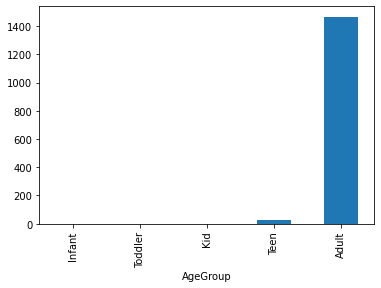

In [84]:
Age_groups.groupby(['AgeGroup']).size().plot(kind = "bar")

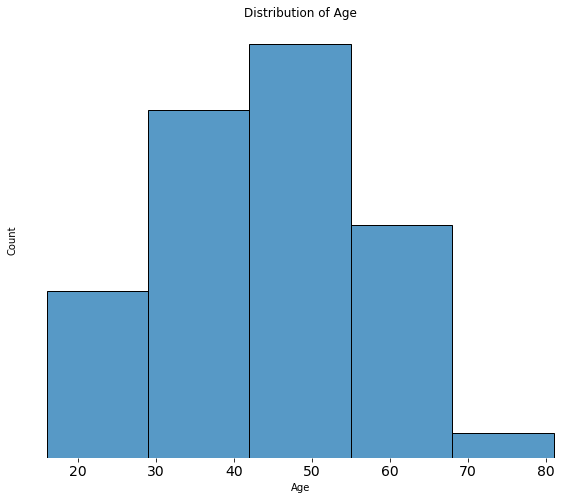

In [85]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=wksched, x="dvage",bins=5)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.xticks(fontsize=14,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
plt.show()

In [86]:
# First grouping based on "serial"
# Within each household we are grouping based on "pnum"
serial_group = wksched.groupby(['serial', 'pnum'])
  
# Print the first value in each group
serial_group.first()

,,strata,psu,wks_wt,dvage,flag_impute_date,imonth,iyear,dow1_sched,date1_sched,sched_diaryday1,t0400_0415_d1,t0415_0430_d1,t0430_0445_d1,t0445_0500_d1,t0500_0515_d1,t0515_0530_d1,t0530_0545_d1,t0545_0600_d1,t0600_0615_d1,t0615_0630_d1,t0630_0645_d1,t0645_0700_d1,t0700_0715_d1,t0715_0730_d1,t0730_0745_d1,t0745_0800_d1,t0800_0815_d1,t0815_0830_d1,t0830_0845_d1,t0845_0900_d1,t0900_0915_d1,t0915_0930_d1,t0930_0945_d1,t0945_1000_d1,t1000_1015_d1,t1015_1030_d1,t1030_1045_d1,t1045_1100_d1,t1100_1115_d1,t1115_1130_d1,...,t1800_1815_d7,t1815_1830_d7,t1830_1845_d7,t1845_1900_d7,t1900_1915_d7,t1915_1930_d7,t1930_1945_d7,t1945_2000_d7,t2000_2015_d7,t2015_2030_d7,t2030_2045_d7,t2045_2100_d7,t2100_2115_d7,t2115_2130_d7,t2130_2145_d7,t2145_2200_d7,t2200_2215_d7,t2215_2230_d7,t2230_2245_d7,t2245_2300_d7,t2300_2315_d7,t2315_2330_d7,t2330_2345_d7,t2345_2400_d7,t0000_0015_d7,t0015_0030_d7,t0030_0045_d7,t0045_0100_d7,t0100_0115_d7,t0115_0130_d7,t0130_0145_d7,t0145_0200_d7,t0200_0215_d7,t0215_0230_d7,t0230_0245_d7,t0245_0300_d7,t0300_0315_d7,t0315_0330_d7,t0330_0345_d7,t0345_0400_d7
serial,pnum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11011209,1,110,117,1.778489,69,0,17,2014,3.0,2014-12-03,2.0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
11011210,2,110,117,1.997310,36,0,17,2014,4.0,2014-12-11,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
11011212,2,110,117,1.229678,44,0,6,2015,6.0,2015-01-10,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11011213,1,110,117,0.771474,42,0,6,2015,6.0,2015-01-10,2.0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11011220,1,110,117,0.955513,52,0,6,2015,7.0,2015-01-18,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54051013,1,108,844,0.482981,41,0,16,2015,7.0,2015-11-22,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
54051014,1,108,844,0.401536,64,0,15,2015,5.0,2015-10-23,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
54051015,1,108,844,0.668231,66,0,15,2015,6.0,2015-10-10,2.0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler=StandardScaler()
scaler.fit(alldays_timeslot)

StandardScaler()

In [90]:
scaled_data=scaler.transform(alldays_timeslot)

In [91]:
from sklearn.decomposition import PCA

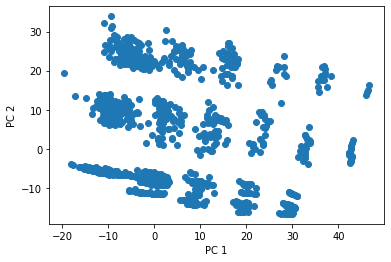

In [92]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(alldays_timeslot)
X_test_pca = pca.transform(alldays_timeslot)
# Plot the first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [93]:
pca=PCA(n_components=3)

In [94]:
pca.fit(scaled_data)

PCA(n_components=3)

In [95]:
x_pca=pca.transform(scaled_data)

Text(0, 0.5, 'Second principle component')

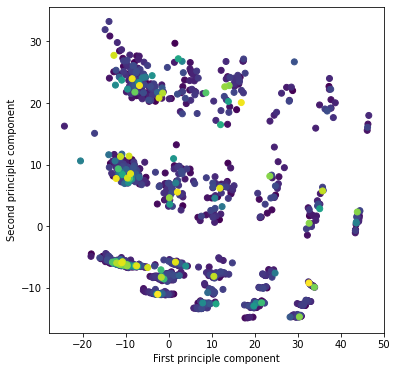

In [96]:
plt.figure(figsize=(6,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=wksched['serial'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

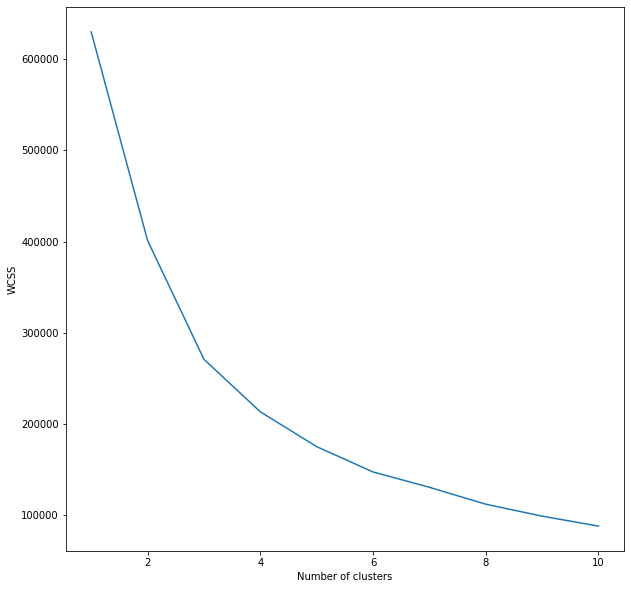

In [97]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x_pca)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
km=cluster.KMeans(n_clusters=2)
km.fit(x_pca)
km.labels_

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

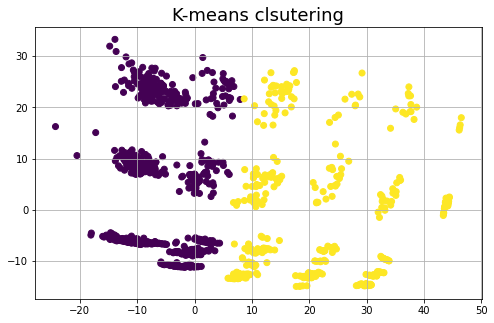

In [99]:
plt.figure(figsize=(8,5))
plt.title("K-means clsutering", fontsize=18)
plt.grid(True)
plt.scatter(x_pca[:,0],x_pca[:,1],c=km.labels_)
plt.savefig('CLUSTERING OUTPUT.png', dpi=300)
plt.show()

In [100]:
individual = pd.read_csv('/content/individual.csv',na_values=" ")
individual.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (339,344,349,542,563,572) have mixed types.Specify dtype option on import or set low_memory=False.



,serial,strata,psu,pnum,DMFlag,HhOut,IndOut,ind_wt,IMonth,IYear,DMSex,DM014,DM016,DM510,DM1115,DM1619,WorkSta,NumAdult,NumChild,NumSSex,NumCPart,NumMPart,NumCivP,DVHsize,DVAge,MarStat,Relsize,Relate1,Relate2,Relate3,Relate4,Relate5,Relate6,Relate7,Relate8,Relate9,Relate10,SelPer,CCPersNo,Accom,...,CareTim6,CareTim7,CareTim8,CareTim9,CareTi10,CareTi11,CareTi12,CareTi13,CareTi14,CareTi15,CareTi16,CareTi17,CareTi18,CareTi19,CareTi20,CareTi21,CareTi22,CareTi23,CareTi24,CareTi25,CareTi26,CareTi27,CareTi28,sic20070,dhhtype,dagegrp,dmarsta,dhiqual,dnssec8,duresmc,dgorpaf,dukcntr,dnrkid04,dilodefr,deconact,dtenure,dtotac,dtotus,dsic,dsoc
0,11010903,-2,-2,1,-6,598,21,NaN,9,2014,1,0,0,0,0,0,4,2,0,0,0,2,0,2,80,3,1,0,1,-2,-2,-2,-2,-2,-2,-2,-2,1,-1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,23.0,3.0,15.0,2.0,1.0,1.0,16.0,10.0,1.0,0.0,3.0,7.0,1.0,-1.0,-1.0,2.0,1.0
1,11010903,-2,-2,2,-6,598,21,NaN,9,2014,2,0,0,0,0,0,4,2,0,0,0,2,0,2,71,3,1,1,0,-2,-2,-2,-2,-2,-2,-2,-2,1,-1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.0,3.0,13.0,2.0,2.0,4.0,16.0,10.0,1.0,0.0,3.0,7.0,1.0,-1.0,-1.0,2.0,4.0
2,11010904,-2,-2,1,-6,598,21,NaN,9,2014,2,0,0,0,0,0,2,2,0,0,0,2,0,2,55,3,1,0,1,-2,-2,-2,-2,-2,-2,-2,-2,1,-1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,89.0,3.0,10.0,2.0,3.0,-9.0,16.0,10.0,1.0,0.0,1.0,2.0,2.0,14.0,-1.0,8.0,NaN
3,11010904,-2,-2,2,-6,598,21,NaN,9,2014,1,0,0,0,0,0,2,2,0,0,0,2,0,2,62,3,1,1,0,-2,-2,-2,-2,-2,-2,-2,-2,1,-1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,84.0,3.0,11.0,2.0,2.0,2.0,16.0,10.0,1.0,0.0,1.0,1.0,2.0,32.0,-1.0,8.0,2.0
4,11010906,-2,-2,1,-6,598,21,NaN,10,2014,2,0,0,0,0,1,2,3,0,0,0,2,0,3,52,3,2,0,1,8,-2,-2,-2,-2,-2,-2,-2,1,-1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,81.0,7.0,9.0,2.0,4.0,8.0,16.0,10.0,1.0,0.0,1.0,2.0,1.0,21.0,-1.0,9.0,9.0


In [101]:
individual.shape

(1887, 603)

In [102]:
individual.isna().sum()

serial     0
strata     0
psu        0
pnum       0
DMFlag     0
          ..
dtenure    1
dtotac     1
dtotus     1
dsic       1
dsoc       3
Length: 603, dtype: int64

In [103]:
individual.dropna()

,serial,strata,psu,pnum,DMFlag,HhOut,IndOut,ind_wt,IMonth,IYear,DMSex,DM014,DM016,DM510,DM1115,DM1619,WorkSta,NumAdult,NumChild,NumSSex,NumCPart,NumMPart,NumCivP,DVHsize,DVAge,MarStat,Relsize,Relate1,Relate2,Relate3,Relate4,Relate5,Relate6,Relate7,Relate8,Relate9,Relate10,SelPer,CCPersNo,Accom,...,CareTim6,CareTim7,CareTim8,CareTim9,CareTi10,CareTi11,CareTi12,CareTi13,CareTi14,CareTi15,CareTi16,CareTi17,CareTi18,CareTi19,CareTi20,CareTi21,CareTi22,CareTi23,CareTi24,CareTi25,CareTi26,CareTi27,CareTi28,sic20070,dhhtype,dagegrp,dmarsta,dhiqual,dnssec8,duresmc,dgorpaf,dukcntr,dnrkid04,dilodefr,deconact,dtenure,dtotac,dtotus,dsic,dsoc
23,11011202,110,117,1,2,210,11,0.828011,12,2014,2,1,2,0,1,1,2,3,1,0,0,2,0,4,48,3,3,0,1,8,8,-2,-2,-2,-2,-2,-2,1,1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,86.0,6.0,8.0,2.0,2.0,4.0,16.0,10.0,1.0,0.0,1.0,1.0,2.0,40.0,-1.0,8.0,6.0
26,11011202,110,117,4,3,210,11,0.856161,12,2014,1,1,2,0,1,1,-1,3,1,0,0,2,0,4,13,-1,3,4,4,15,0,-2,-2,-2,-2,-2,-2,1,1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0,-1.0,-1.0,-1.0,16.0,10.0,1.0,0.0,4.0,13.0,2.0,-1.0,-1.0,-1.0,-1.0
27,11011203,110,117,1,2,210,11,1.134924,12,2014,1,0,0,0,0,0,4,2,0,0,0,2,0,2,75,3,1,0,1,-2,-2,-2,-2,-2,-2,-2,-2,1,-1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,30.0,3.0,14.0,2.0,1.0,1.0,16.0,10.0,1.0,0.0,3.0,7.0,1.0,-1.0,-1.0,2.0,1.0
29,11011207,110,117,1,1,110,11,0.745875,12,2014,2,0,0,0,0,0,4,2,0,0,0,2,0,2,68,3,1,0,1,-2,-2,-2,-2,-2,-2,-2,-2,1,-1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,86.0,3.0,12.0,2.0,2.0,7.0,16.0,10.0,1.0,0.0,3.0,7.0,1.0,-1.0,-1.0,8.0,4.0
30,11011207,110,117,2,1,110,11,0.743546,12,2014,1,0,0,0,0,0,4,2,0,0,0,2,0,2,74,3,1,1,0,-2,-2,-2,-2,-2,-2,-2,-2,1,-1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,43.0,3.0,13.0,2.0,4.0,5.0,16.0,10.0,1.0,0.0,3.0,7.0,1.0,-1.0,-1.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,12220920,152,196,4,3,210,11,0.839504,10,2014,2,1,1,0,1,1,-1,3,1,0,0,2,0,4,14,-1,3,4,4,12,0,-2,-2,-2,-2,-2,-2,1,1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0,-1.0,-1.0,-1.0,15.0,8.0,1.0,0.0,4.0,13.0,2.0,-1.0,-1.0,-1.0,-1.0
1880,12221201,154,201,1,1,110,11,1.047156,3,2015,1,0,0,0,0,0,2,1,0,0,0,0,0,1,26,1,-1,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-1,2,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,47.0,1.0,4.0,1.0,3.0,7.0,15.0,8.0,1.0,0.0,1.0,1.0,3.0,45.0,-1.0,5.0,7.0
1881,12221203,154,201,1,1,110,11,0.843871,1,2015,2,0,0,0,0,0,2,1,0,0,0,0,0,1,23,1,-1,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-1,2,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,85.0,1.0,3.0,1.0,1.0,3.0,15.0,8.0,1.0,0.0,1.0,1.0,3.0,53.0,-1.0,8.0,2.0
1884,12221209,154,201,1,1,110,11,0.629325,1,2015,2,2,2,0,2,0,7,1,2,0,0,0,0,3,44,5,2,0,8,8,-2,-2,-2,-2,-2,-2,-2,1,1,1,...,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,85.0,4.0,7.0,3.0,4.0,3.0,15.0,8.0,1.0,0.0,1.0,2.0,1.0,50.0,-1.0,8.0,2.0


DMSex
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DVAge, dtype: object

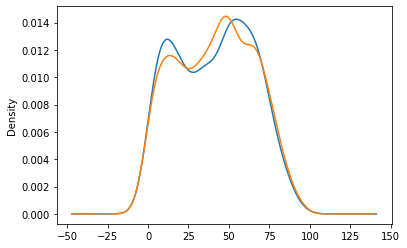

In [104]:
individual.groupby('DMSex').DVAge.plot(kind='kde')

In [105]:
# iterating an element of group

#grp = individual.groupby('serial')
#for NumAdult, serial in grp:
#    print(NumAdult)
#    print(serial)
#    print()

In [106]:
individual['WorkSta'].value_counts()

 2     692
 4     397
-1     379
 1     176
 7     100
 6      60
 3      42
 8      25
 5      11
 97      5
Name: WorkSta, dtype: int64

In [107]:
individual["DMSex"]=individual["DMSex"].replace(to_replace =1,value ="Male")
individual["DMSex"]=individual["DMSex"].replace(to_replace =2,value ="Female")

individual["WorkSta"]=individual["WorkSta"].replace(to_replace =1.0,value ="Self-empl")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =2.0,value ="Paid-empl(full/part-time)")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =3.0,value ="Unemployed")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =4.0,value ="Retired")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =5.0,value ="Mat-leave")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =6.0,value ="Look-aft family/home")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =7.0,value ="Full-time student")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =8.0,value ="Long-term sick/disabled")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =9.0,value ="Govt-training")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =10.0,value ="Family business")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =97.0,value ="Doing something else")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =-1.0,value ="Item not applicable")
individual["WorkSta"]=individual["WorkSta"].replace(to_replace =-9.0,value ="No answer/refused")

individual['WorkSta']=individual['WorkSta'].str.replace("Item not applicable", "NA")
individual['WorkSta']=individual['WorkSta'].str.replace("No answer/refused", "NA")
individual['WorkSta']

0                         Retired
1                         Retired
2       Paid-empl(full/part-time)
3       Paid-empl(full/part-time)
4       Paid-empl(full/part-time)
                  ...            
1882      Long-term sick/disabled
1883            Full-time student
1884            Full-time student
1885                           NA
1886                           NA
Name: WorkSta, Length: 1887, dtype: object

In [108]:
individual['WorkSta'].value_counts()

Paid-empl(full/part-time)    692
Retired                      397
NA                           379
Self-empl                    176
Full-time student            100
Look-aft family/home          60
Unemployed                    42
Long-term sick/disabled       25
Mat-leave                     11
Doing something else           5
Name: WorkSta, dtype: int64

([], <a list of 0 Text major ticklabel objects>)

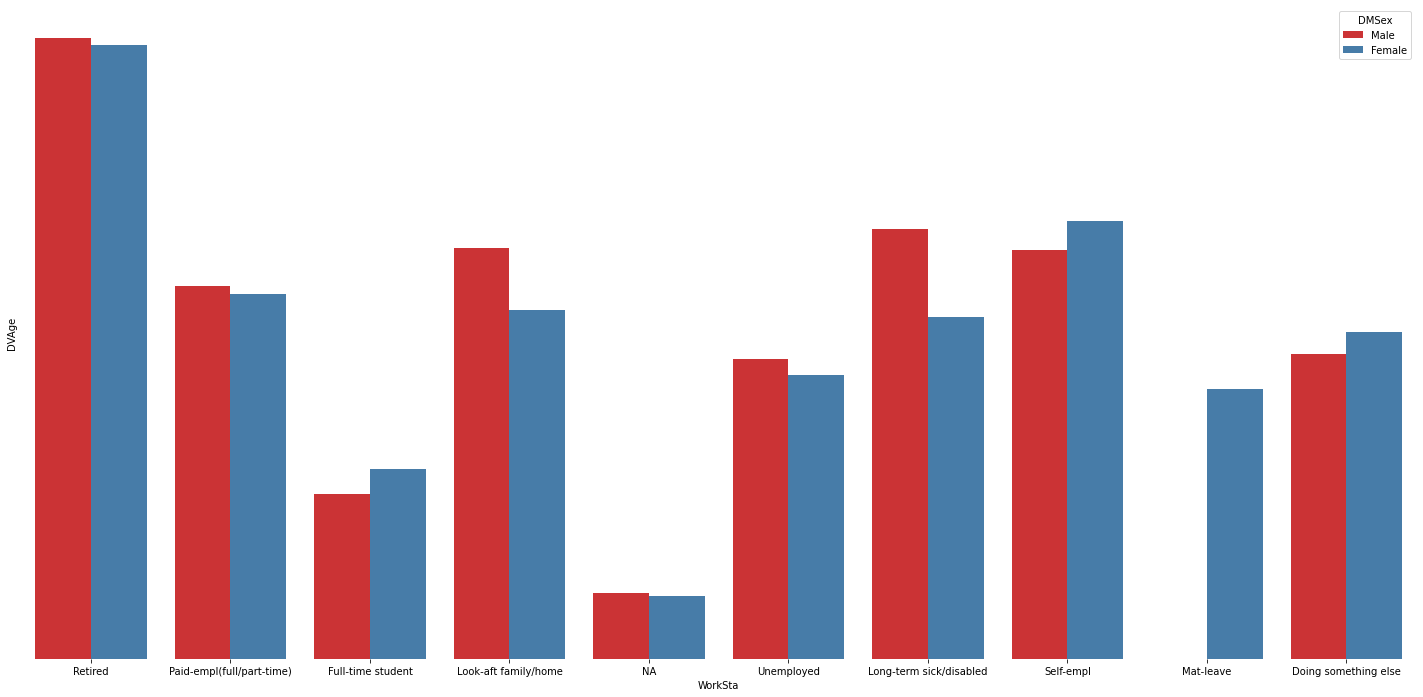

In [109]:
plt.figure(figsize=(25,12))
sns.barplot(x='WorkSta',y='DVAge',data = individual, hue = 'DMSex',palette="Set1",ci= None)
plt.xticks(fontsize=10,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])